In [3]:
import requests

In [4]:
# Endpoint Home
response = requests.get('http://127.0.0.1:5000/')
print(response.json())

{'endpoints': {'clasificacion': {'predict_get': 'GET /clasificacion/predict?id=<id>', 'predict_post': 'POST /clasificacion/predict (Body: image)', 'predict_random': 'GET /clasificacion/predict/random'}, 'history': 'GET /history (Query: type, limit)', 'segmentacion': {'predict_get': 'GET /segmentacion/predict?id=<id>', 'predict_post': 'POST /segmentacion/predict (Body: image)', 'predict_random': 'GET /segmentacion/predict/random'}}, 'models': {'clasificacion': True, 'segmentacion': True}, 'status': 'online'}


In [6]:
# Endpoint clasificación predict post (envio de imagen)

image_path = r"..\Mini_base_datos\TCGA_CS_4941_19960909_14.tif"

with open(image_path, 'rb') as f:
    response = requests.post(
        'http://127.0.0.1:5000/clasificacion/predict',
        
        files={'image': (image_path, f, 'image/tiff')}
    )

print(response.json())

{'confidence': '100.00%', 'prediction_id': 7, 'prediction_label': 'Detectado(1)', 'success': True}


In [7]:
# ENdpoint clasificacion get (consultamos la imagen)

response = requests.get('http://127.0.0.1:5000/clasificacion/predict?id=7')
print(response.json())

{'confidence': '100.00%', 'date': '2025-12-09T16:49:53.578983', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 7, 'predicted_class': 'Detectado(1)', 'type': 'clasificacion'}


In [8]:
# Endpoint Clasificacion predict random

response = requests.get('http://127.0.0.1:5000/clasificacion/predict/random')
print(response.json())

{'confidence': '100.00%', 'filename': 'TCGA_CS_4941_19960909_7.tif', 'prediction_label': 'No detectado (0)'}


{'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'mask_base64': '', 'segmentation_id': 14, 'success': True}

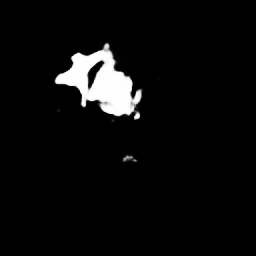

In [53]:
# Endpoint segmentacion predict post

image_path = r"..\Mini_base_datos\TCGA_CS_4941_19960909_14.tif"

with open(image_path, 'rb') as f:
    response = requests.post(
        'http://127.0.0.1:5000/segmentacion/predict',
        files={'image': (image_path, f, 'image/tiff')}
    )

print(response.json())
result = response.json()

{'date': '2025-12-09T17:29:25.403098', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 14, 'mask_base64': '', 'type': 'segmentacion'}

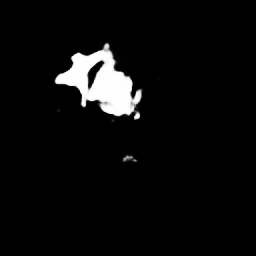

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

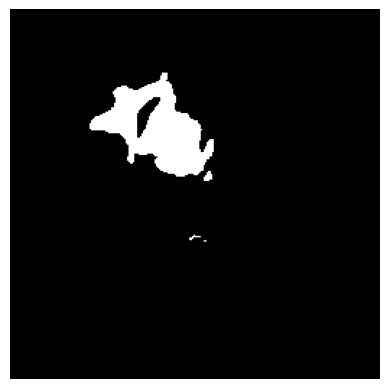

In [54]:
# Endpoint segmentación get
import numpy as np
import requests
import base64
from PIL import Image
import io
import matplotlib.pyplot as plt

response = requests.get('http://127.0.0.1:5000/segmentacion/predict?id=14')
print(response.json())




mask_base64 = result['mask_base64'].split(",")[1]
image_bytes = base64.b64decode(mask_base64)
mask_image = Image.open(io.BytesIO(image_bytes))
mask_array = np.array(mask_image)/255
pred_mask = (mask_array > 0.5).astype(np.uint8)
plt.imshow(pred_mask, cmap='gray')
plt.axis('off')


{'filename': 'TCGA_CS_4941_19960909_19.tif', 'mask_base64': ''}

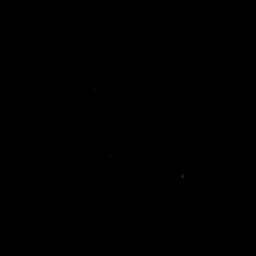

In [11]:
# Endpoint segmentación predict random


response = requests.get('http://127.0.0.1:5000/segmentacion/predict/random')
print(response.json())

{'count': 8, 'data': [{'date': '2025-12-09T16:50:26.984145', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 8, 'mask_base64': '', 'type': 'segmentacion'}, {'confidence': '100.00%', 'date': '2025-12-09T16:49:53.578983', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 7, 'predicted_class': 'Detectado(1)', 'type': 'clasificacion'}, {'confidence': '100.00%', 'date': '2025-12-09T16:47:55.504455', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 6, 'predicted_class': 'Detectado(1)', 'type': 'clasificacion'}, {'date': '2025-12-09T16:06:30.752602', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 5, 'mask_base64': '', 'type': 'segmentacion'}, {'date': '2025-12-09T15:58:49.870989', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 4, 'mask_base64': '', 'type': 'segmentacion'}, {'date': '2025-12-09T15:58:43.543322', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id':
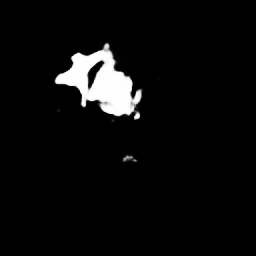
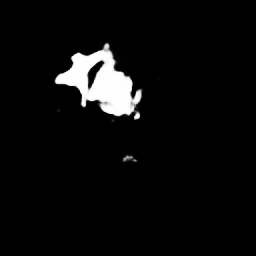
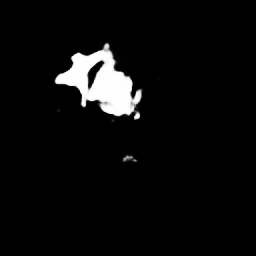
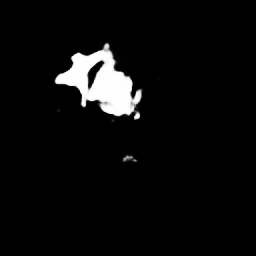
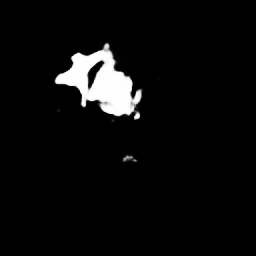

In [12]:
# Endpoint history completa 
response = requests.get('http://127.0.0.1:5000/history')
print(response.json())


In [13]:
# Endpoint history clasificación

response = requests.get('http://127.0.0.1:5000/history?type=clasificacion')
print(response.json())

{'count': 3, 'data': [{'confidence': '100.00%', 'date': '2025-12-09T16:49:53.578983', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 7, 'predicted_class': 'Detectado(1)', 'type': 'clasificacion'}, {'confidence': '100.00%', 'date': '2025-12-09T16:47:55.504455', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 6, 'predicted_class': 'Detectado(1)', 'type': 'clasificacion'}, {'confidence': '100.00%', 'date': '2025-12-09T15:54:08.259901', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_1.tif', 'id': 1, 'predicted_class': 'No detectado (0)', 'type': 'clasificacion'}]}


{'count': 5, 'data': [{'date': '2025-12-09T16:50:26.984145', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 8, 'mask_base64': '', 'type': 'segmentacion'}, {'date': '2025-12-09T16:06:30.752602', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 5, 'mask_base64': '', 'type': 'segmentacion'}, {'date': '2025-12-09T15:58:49.870989', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 4, 'mask_base64': '', 'type': 'segmentacion'}, {'date': '2025-12-09T15:58:43.543322', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 3, 'mask_base64': '', 'type': 'segmentacion'}, {'date': '2025-12-09T15:58:30.613254', 'filename': '..\\Mini_base_datos\\TCGA_CS_4941_19960909_14.tif', 'id': 2, 'mask_base64': '', 'type': 'segmentacion'}]}

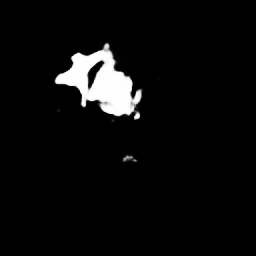
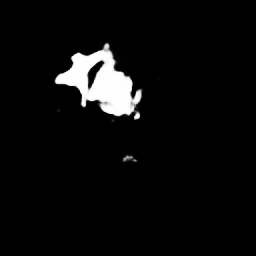
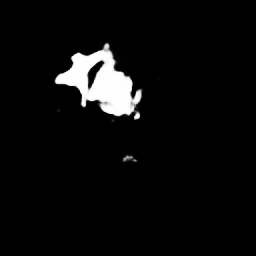
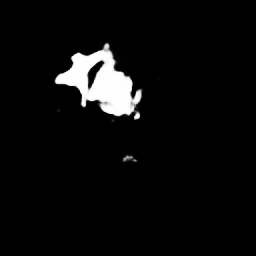
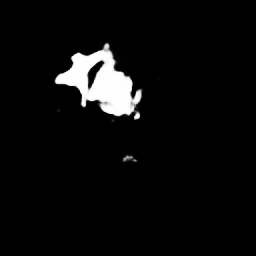

In [14]:
# Endpoint history segmentación
response = requests.get('http://127.0.0.1:5000/history?type=segmentacion')
print(response.json())
